# Identification
Please indicate your name and parcours

Student 1: Nesrine Naaman

Student 2: Giang Le

# Practical works 9 & 10: Face recognition by Eigenfaces method


**The objective of this practical work is to study the properties of the Eigenfaces face recognition method.**

We propose to develop a system capable of:
- identify a face from a database of faces 
- determine whether an image contains a face present in the database
- to decide whether an image represents a face or not

Tools developed in this practical work will be applied to the Yale Faces Database.

## General principle

The problem of face recognition is defined as follows: given a face image, one wishes to determine the identity of the corresponding person.
To this end, it is necessary to have reference images, in the form of a database of faces of all persons known by the system. 
Each face is associated with a vector of characteristics. 
These characteristics are supposed to be invariant for the same person, and different from one person to another one. 
Face recognition then consists of comparing the vector of characteristics of the face to be recognized with those of each of the faces of the database. 
This makes it possible to find the person in the database having the most similar face.

There are several types of methods, distinguished by the type of characteristics used, see _S.A. Sirohey, C.L. Wilson, and R. Chellappa. Human and machine recognition of faces: A survey. Proceedings of the IEEE, 83(5), 1995_ for a state of the art:

- The approaches by face models proceed to a biometric analysis of faces. Pertinent biometrics are the distance between the eyes, length of the nose, and shape of the chin...
- Image-based approaches, by contrast, directly compare faces, considering them as images, for which measures of pre-attentive similarities (without a priori model) are defined.
- Hybrid approaches use the notions of similarity between images, but add a priori knowledge about the structure of a face.

![principe.png](./figs/Figure_1.png)
<center>Figure 1: General Principle of a Face Recognition System</center>

## Analysis by Eigenfaces

Face recognition by Eigenfaces is an image-based approach. 
Each face image is considered as a vector in a space having as many dimensions as the number of pixels in the image. 
The image characteristics are extracted by a method of dimensionality reduction based on principal component analysis (PCA). 
This approach was originally proposed in 1991, see Mr. Turk and A. Pentland. Eigenfaces for recognition. J. Cognitive Neuroscience, 3(1) :71-86, 1991_.

In the following, we will use the italic notation to designate scalars ($m, K,\dots$) and vectors ($x, u$), and boldface  for the matrices ($\mathbf X, \mathbf X_c, \mathbf W, \dots$).

A face image is noted $x$ and represented as a vector of $d$ components. $x[i] (i=0,\cdots,d-1)$ is the pixel number $i$ of this image. A set of faces form a cloud of points in the space $\mathbb{R}^d$. 
The database is divided into two sets: the *training* or *reference* set, used to learn the faces, and the *test* set, used to test the method. 
Faces of the training set are denoted by $x_k^{train}$ $(k=0,\cdots,N_{train}-1)$ and faces of the test set are denoted by $x_k^{test}$ $(k=0,\cdots,N_{test}-1) (k=0,\cdots,N_{test}-1)$.

We note $x_{average}$ the average of the reference faces, or average face. 
The principle of the Eigenfaces method is to model the difference of any face in relation to this average face by a linear combination of a limited number of images $u_h$, called Eigenfaces. 
One image of face $x \in \mathbb{R}^d$ is thus expressed as the average face to which is added a linear combination of eigenfaces:

$$x = x_{average} + \sum_h a_h u_h + \varepsilon$$

where $a_h$ represents the weight of *the eigenface* of index $h$ in the face $x$, and $\varepsilon$ represents the error between $x$ and its approximation by eigenfaces (the error is due to the truncation of the basis of eigenvectors). 
Coefficients $a_h$ play a very important role for face recognition, because they correspond to the face coordinates $x$ in the face subspace.

The Eigenfaces method is based on the fact that the number of eigenfaces is much smaller than the total size of the space, which is called dimensionality reduction. In other words, the basis of eigenfaces is truncated, keeping only the vectors coding for the most significant information.
The images are therefore analyzed in a sub-space of reduced dimensions, which represents more specifically faces, among all possible types of images.

The average face is always the same for a fixed reference database, each face is examined after subtraction of the average face.

## Face database

We use the Yale Faces image database, http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html.
In this database, all the faces have been preprocessed, in order to resize and crop them to the size $64\times64$ pixels, so the images can be compared pixel per pixel.


This database contains 120 greyscale images, representing the faces of 15 people. There are 8 images per person, each corresponding to a category of images varying according to the following criteria (see Figure 2):
- variation of facial expression: normal, sad, sleepy, surprised,
    wink, happy
- variation of accessories: glasses, noglasses,

![database.png](./figs/Figure_2.png)
<center>Figure 2: Illustration of the shooting categories</center>

The database is divided into two groups: the reference group will be used as a training set, and the other group as a test set: 
- the reference base contains $n$ images, each with a number of pixels $d=n_l\times n_c$. There are $6$ images per person in the training database, so $n=6\times15=90$. Each image is $64\times64$, hence $d=4096$, 
- the test base contains $2$ images per person so a total of 30 images. Each image is again $64\times64$.

In the following, we always manipulate face images in the form of vectors, and a set of faces in the form of a matrix where each column is a face. 
As we use Numpy, the images are stored in a multi-dimensional array of reals (double). 
This array is viewed as a matrix $\mathbf X$ of size $d\times n$: $$\mathbf X= \left[ x_0, ..., x_{n-1}\right]$$.

The matrix $\mathbf X$ is split into $\mathbf X^{train}$ and $\mathbf X^{test}$ of size $d\times N_{train}$ and $d\times N_{test}$, respectively.

# Exercise 1: loading the database, display, and centering of faces

Vectors $id$ and $cat$ give information about the images: $id[k]$ and $cat[k]$ are respectively the identification (an index) and the category of face $k$. These vectors are available for the reference and the test bases and will be useful in the following.

To load the database, we simply have to read the Matlab file `YaleFaces.mat` provided with this notebook: it provides the matrices and vectors $\mathbf X^{train}, \mathbf X^{test}, id^{train}, id^{test}, cat^{train}, cat^{test}$.

The following code loads the database and creates the various matrices and vectors: 

In [18]:
##### Useful libraries
import numpy.linalg
import numpy as np
import matplotlib.pyplot as plt

## Loading YaleFaces database
import scipy.io

yaleFaces = scipy.io.loadmat('./YaleFaces.mat')

# The training set (90 faces)
X_train = yaleFaces['X_train']
cat_train = yaleFaces['cat_train'][0]
id_train = yaleFaces['id_train'][0]-1

# The test set (30 faces)
X_test = yaleFaces['X_test']
cat_test = yaleFaces['cat_test'][0]
id_test = yaleFaces['id_test'][0]-1

# Additional images that don't contain faces 
X_noface = yaleFaces['X_noface']

In [19]:
def niceDisplay14(affichages,titres=None):
    """ list[Array]*list[str] -> NoneType
        display from 1 up to 4 images or vectors with optionnal titles
        2D arrays are displayed as image with imshow()
        1D arrays are displayed as curve with plot()
    """
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >5 or nb_affichages < 1 :
        raise ValueError('niceDisplay_14 : affichage should be a list of length 1 up to 5')
        
    if nb_affichages != len(titres):
        raise ValueError('niceDisplay_14 : titres must have same length than affichage')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = plt.subplot(101+10*nb_affichages+i)
        s.set_title(titres[i], fontsize=40)
        if len(affichages[i].shape)==2 and affichages[i].shape[0] > 1 and affichages[i].shape[1] > 1:
            # on affiche une image
            s.axis('off')
            s.imshow(affichages[i], cmap="gray",interpolation='nearest', aspect='equal')
        else :
            # il s'agit d'une seule ligne, à afficher comme une courbe
            plt.plot(affichages[i])
            courbes=True

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = plt.gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    plt.show()

1.  Write a function that computes the average face $x_{moy}$. \
    Tip: use `mean` function from Numpy.

In [20]:
def meanFaces(X):
    """ Array[d,n] -> Vector[d] """
    mean_values=[]
    n,m=X.shape
    for row in range(n):
        mean_values+=[np.mean(X[row,:])] # calculating the mean of each feature across all faces in X
    return mean_values

2.  Write a function that centers the faces. \
    Recall: center means subtract the average face.

In [21]:
def centeredFaces(X):
    """ Array[d,n]*Vector[d] -> Array[d,n] """
    centeredFace=np.float64(X.copy())
    averageFace=meanFaces(centeredFace)
    n,m=X.shape
    for j in range(m): # for each face,
        for i in range(n): # loop the features and subtract them from the feature index i of the avg face
            centeredFace[i,j]=np.float64(centeredFace[i,j]-averageFace[i])
    return centeredFace

3. Write a function `deflat()` that takes as argument a face, represented as a vector of 4096 elements, and returns an image of size $64\times64$. \
   Important: the Yale Faces database has been created in Matlab, for which the matrices are organized column by column. It may be useful to transpose the matrix.


In [22]:
def deflat(V):
    """" Vector[4096] -> Array[64,64] """
    image64=np.reshape(V,(64,64)) # using the reshape function we change the 1d array of 4096 features into a 2d image of 64x64
    image64=np.transpose(image64)
    return image64

4. Display the average face, as well as a few faces with the associated centered faces. Here is an example of the expected result:
![Figure_3.png](./figs/Figure_3.png)
<center>Figure 3: average face and centering of the database</center>

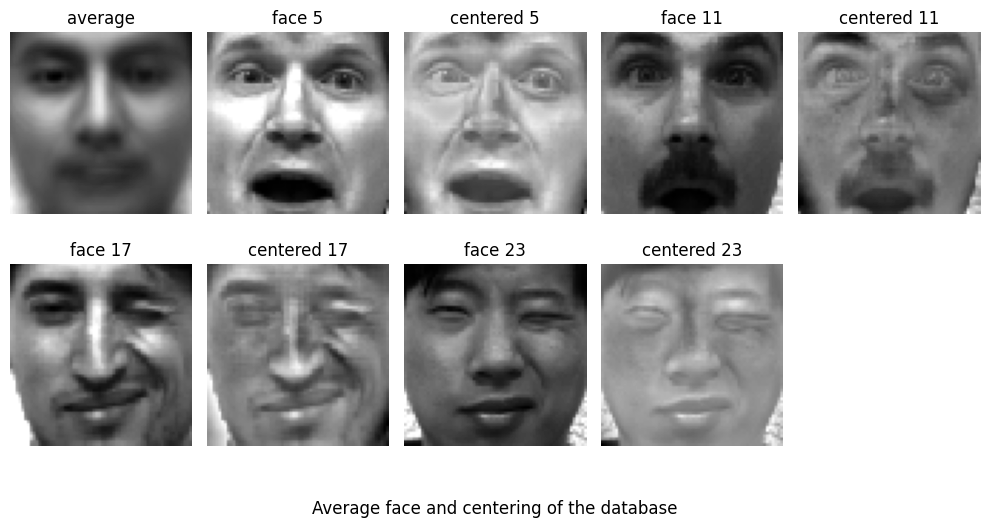

In [23]:
# We compute the average face and the centered faces in X_train and display the average face and some of the centered faces (after deflattening them)
avg_face=meanFaces(X_train)
avg_face_image=deflat(avg_face)
centered_faces=centeredFaces(X_train)

# face number 5:
face5=X_train[:,5]
face5_image=deflat(face5)
centered5=centered_faces[:,5]
centered5_image=deflat(centered5)

# face number 11:
face11=X_train[:,11]
face11_image=deflat(face11)
centered11=centered_faces[:,11]
centered11_image=deflat(centered11)

# face number 17:
face17=X_train[:,17]
face17_image=deflat(face17)
centered17=centered_faces[:,17]
centered17_image=deflat(centered17)

# face number 23:
face23=X_train[:,23]
face23_image=deflat(face23)
centered23=centered_faces[:,23]
centered23_image=deflat(centered23)

listofimgs1=[avg_face_image, face5_image, centered5_image, face11_image, centered11_image, face17_image, centered17_image, face23_image, centered23_image]
titres1=["average","face 5", "centered 5", "face 11", "centered 11","face 17", "centered 17", "face 23", "centered 23"]

plt.figure(figsize=(10, 5))

# Plotting the 9 images
for i in range(1, 10):
    s=plt.subplot(2, 5, i)  # 3 rows, 5 columns, and the i-th subplot
    img = listofimgs1[i-1]  
    s.imshow(img, cmap='gray')
    s.set_title(titres1[i-1], fontsize=12)
#     plt.title(titles[i-1])
    s.axis('off')

# plt.title("Average faces")
plt.tight_layout() 
plt.figtext(0.5, -0.05, "Average face and centering of the database", ha="center", fontsize=12)
plt.show()

# Exercise 2: Computation of Eigenfaces (PCA)


The method developed by Turk and Pentland defines the eigenfaces as the main axes obtained by carrying out a principal component analysis (PCA) of the vectors associated with the reference faces. 
**The eigenfaces are thus the eigenvectors of the covariance matrix $\mathbf X_c\mathbf X_c^\top$**, of size $d\times d$ , where the matrix $\mathbf X_c$ of the same size as $\mathbf X$ represents all the centered faces:
$$\mathbf X_c= \left[ x_0-x_{moy}, \cdots x_{n-1}-x_{moy}\right]$$
Each line of $\mathbf X_c$ corresponds to a pixel $p$, each column of $\mathbf X_c$ corresponds to a reference face of index $k$.

Rather than using eigenvalue decomposition, we will use singular value decomposition (SVD). 
The SVD decomposes the matrix $\mathbf X_c$ of size $d\times n$ into 3 matrices $\mathbf U$, $\mathbf S$, $\mathbf V$ such as :

$$\mathbf X_c=\mathbf U \mathbf S\mathbf V^\top$$

where $\mathbf U$ and $\mathbf V$ are orthogonal matrices ($\mathbf U \mathbf U^\top=\mathbf U^\top \mathbf U=\mathbf I_d^d$ and $\mathbf V \mathbf V^\top=\mathbf V^\top \mathbf V=\mathbf I_d^n$) of respective sizes $d\times d$ and $n\times n$, and $\mathbf S$ is a matrix of size $d\times n$ with null elements everywhere except on the main diagonal.

This decomposition has the following properties:
- the columns of $\mathbf V$ are the eigenvectors of $\mathbf X_c^\top\mathbf X_c$, 
- the columns of $\mathbf U$ are the eigenvectors of $\mathbf X_c\mathbf X_c^\top$,
- the matrix $\mathbf S$ is diagonal. The diagonal represents the singular values of $\mathbf X_c$, equal to the square roots of the eigenvalues $\lambda_k$ of $\mathbf X_c^\top\mathbf X_c$ and
    $\mathbf X_c\mathbf X_c^\top$. 

With Numpy, the SVD can be calculated by this way:

`U, S, V = numpy.linalg.svd(Xc)`

In our case, $n<d$, and the eigenvalues $\lambda_k$ of $\mathbf X_c\mathbf X_c^\top$ are therefore all null for $k>n$.
We will not need the associated eigenvectors $k>n$. 
The `svd` function has a fast mode, which calculates only the eigenvectors corresponding to the columns of the matrix passed as argument:

`U, S, V = svd(Xc, full_matrices=False)`


This command returns the matrices $\mathbf U$ and $\mathbf V$, of size $d\times n$ and $n\times n$, and the matrix $\mathbf U$ matrix has been truncated, only the first $n$ columns are retained:
$$\mathbf U= \left[ u_1, \cdots, u_n\right]$$
Finally `S` is a vector of size $n$ and represents the diagonal matrix $\mathbf S$.

1. Write a function `eigenfaces(Xc)` which returns a t-uple consisting of the $\mathbf U$ matrix of eigenfaces, computed from a centered database $\mathbf X_c$, and the table of associated eigenvalues.
        

In [24]:
def eigenfaces(Xc):
    """ Array[d,n] -> Array[d,n]*Vector[n] """
    U,S,V=np.linalg.svd(Xc, full_matrices=False)
    # U is eigen vector of Xc XcT
    eigenvalues=[] # The eigen values are the square of the diagonal elements in the diagonal matrix S
    for i in S:
        eigenvalues+=[i**2]
    return (U,eigenvalues)

2. Use this function to calculate $\mathbf U$ and $\mathbf S$. Normalize then the eigenvalues so that their sum is equal to 1.


In [25]:
# Xc = centered_faces
tupleres=eigenfaces(centered_faces) # tupleres is the result returned by eigenfaces, which is (U, eigenvalues)
eigenvalues=tupleres[1] 
sumeigen=sum(eigenvalues)
normalized_eigen=eigenvalues/sumeigen # normalizing the eigenvalues such that their sum is equals to 1


3. Display the average face and the first 15 eigenfaces (see figure 4, use the `plt.subplot()` function).
   and their associated own values. Give your interpretation of the eigenfaces images?

![Figure_4.png](./figs/Figure_4.png)
<center>Figure 4: the 15 first eigenfaces</center>

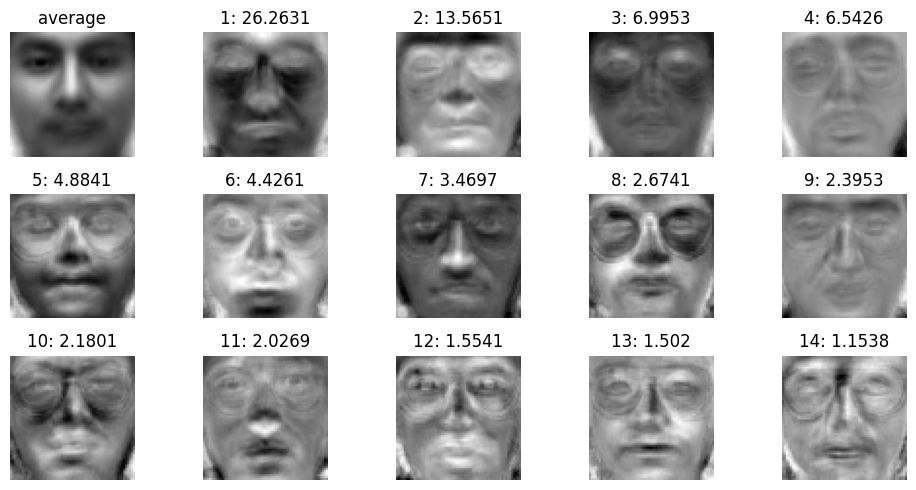

In [26]:
U=tupleres[0] # U is the matrix of eigenvectors (or eigenfaces)

listimages=[]
titles=["average"]
for i in range(15): # we have 15 eigenfaces
    facei=U[:,i] # facei is each eigenvector (or eigenface) in U 
    eigeni=normalized_eigen[i]*100 # normalized eigen value i associated with the eigenvector i
    eigeni=round(eigeni, 4) # rounding the eigenvalue to have only 4 digits after the decimal point
    facei_image=deflat(facei) # eigen face i
    listimages+=[facei_image] # this is the list of all the eigenfaces that we're gonna display later
    titles+=[""+str(i+1)+": "+str(eigeni)] # this is the title of each figure of each eigenface we're gonna display later

listimages.insert(0,avg_face_image) # adding the avergae face to the list of faces we will display below

plt.figure(figsize=(10, 5))

# Plotting the 15 eigenfaces in a 3x5 grid
for i in range(1, 16):
    s=plt.subplot(3, 5, i)  # 3 rows, 5 columns, and the i-th subplot
    img = listimages[i-1]  
    s.imshow(img, cmap='gray')
    s.set_title(titles[i-1], fontsize=12)
#     plt.title(titles[i-1])
    s.axis('off')

plt.tight_layout() 
plt.show()

In [27]:
len(facei)

4096

### Interpretation
The eigenfaces are not really actual faces of real people. Each eigenface i represents all the faces in X_train with features closest to those in Ui (vector of eigenface i). The eigenfaces are displayed in a decreasing order in terms of their eigenvalues. This means that the eigenface U1 has the maximum eigen value 26.2631, it represents the most variations in the features along this vector.

4. Plot the curve of the cumulative sum of the normalized eigenvalues (see Figure 5 for the expected result), to see how much variation is captured by the first $K$ eigenfaces. How many eigenfaces are needed to obtain a good reconstruction?    
    
![Figure_5.png](./figs/Figure_5.png)
<center>Figure 5: cumulative sum of eigenvalues</center>

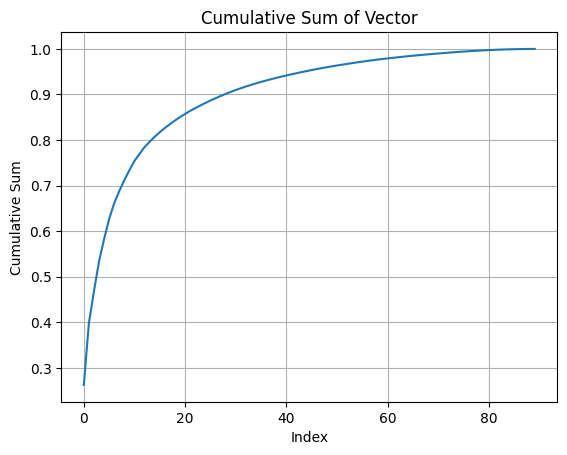

In [28]:
cum_sum=[normalized_eigen[0]]
for i in range(1,len(normalized_eigen)):
    cum_sum+=[cum_sum[i-1]+normalized_eigen[i]]
    
plt.plot(cum_sum)
plt.title('Cumulative Sum of Vector')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.grid(True)
plt.show()


### Interpretation
The list of eigenvalues is sorted in decreasing order. we have 90 eigen values. that's why when we are adding the first values the increase is big because we're adding maximum values. and at the end the increase becomes slower until plateauing which makes sense because the last eigenvalues are the smallest. 
A good reconstruction would be around a cumulative sum of 0.9, which corresponds to around 30-40 eigenvalues. We can say then that we need at least around 30-40 eigenfaces to obtain a good reconstruction. 

# Exercise 3: projection in the subspace of faces


In the following, we use a reduced number of eigenfaces/eigenvectors. The vectorial space of faces, $\mathbf W_K$, is spanned by the basis formed with the $K$ first eigenvectors:

$$\mathbf W_K = \left[ u_1, ..., u_K\right]$$

Note that the set of columns of $W_K$ is an orthonormal basis, so $\mathbf W^\top_K\times \mathbf W_K=\mathbf I_d^K$.

The **projection of a face image $x$ in the face subspace** is simply done by subtracting from $x$ the average face and applying the scalar product with each eigenvector. 
This gives the coordinates of the image $x$ in the subspace of faces, which is of dimension $K$.

Each face therefore has several representations:
-   the original image, a vector $x \in \mathbb{R}^d$
-   the coordinates of the projected image $z$ in the basis of eigenfaces,
    $\left\lbrace a_h\right\rbrace$,
    $h \in\left\lbrace 1;K\right\rbrace$ (subspace of faces):
    $$z = \mathbf W_K^\top (x-x_{average})$$
-   its reconstruction in the original space $\mathbb{R}^d$,
    $\tilde{x}$:
    $$\tilde{x} = x_{average} + \sum_h a_h u_h = x_{moy} + \mathbf W_K  z$$

**The reconstruction error is defined** as the distance between a face $x$ and the associated reconstruction $\tilde x$:
$$E^{recons}(x) =\|x-\tilde{x}\|_2  = \sqrt{\sum_{p=1}^d \left( x(p) - \tilde{x}(p)\right) ^2}$$

1. Write a function `projEigenfaces()` which takes as arguments a face, $x$, the average face, $x_{average}$, the subspace of faces $\mathbf W$, the number of eigenfaces $K$, and  computes the coordinates of projected face $z$ in the subspace $\mathbf W_K$ of faces.    

In [29]:
def projEigenface(x, x_mean, W, K):
    """ Vector[d]*Vector[d]*Array[d,n]*int -> Vector[K] """
    xc=x-x_mean
    Wk=W[:,:K]
    return np.matmul(np.transpose(Wk),xc)

2.  Write a function `reconstruct()` which takes as arguments a projected face, $z$, the average face, $x_{average}$, and the truncated subspace of face, $W$ and $K$, and computes the coordinate of $x$ in the original space ($\mathbb{R}^n$).    

In [30]:
def reconstruct(z, x_mean, W, K):
    """Vector[K]*Vector[d]*Array[d,n]*int -> Vector[d] """
    Wk=W[:,:K]
    product=np.matmul(Wk,z)
    return x_mean+product

3.  Write a function  `errorReconstruct()` which computes the recontruction error between $\tilde{x}$ and $x$.

In [31]:
def errorReconstruct(x_r, x):
    """Vector[d]*Vector[d] -> float """
    return np.linalg.norm(x - x_r)

4.  Write a function `affiche_Reconstruction()` which displays:
    - the original face $x$,
    - the reconstructed faces $x_r$ for various values of $K$ (for instance, $K =$ 5, 10, 25, 50, 90).

In [51]:
def affiche_reconstruction(x, x_moy, W, listK):
    """ Vector[d]*Vector[d]*Array[d,n]*list[int] -> NoneType """
    plt.figure(figsize=(8, 2))  # Adjust the figure size if needed
    plt.subplot(1, len(listK)+1, 1)  # 3 rows, 5 columns, and the i-th subplot
    x_image=deflat(x)
    plt.imshow(x_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    for i,k in enumerate(listK):
        z=projEigenface(x,x_moy,W,k)
        xr=reconstruct(z,x_moy,W,k)
        xr_image=deflat(xr)
        plt.subplot(1, len(listK)+1, i+2)  # 3 rows, 5 columns, and the i-th subplot
        plt.imshow(xr_image, cmap='gray')
        plt.title(k)
        plt.axis('off')

5.  Test the previous functions by displaying the projection/reconstruction result for several images (from the training and test bases). Figure 6 shows the result of the reconstruction for image 50 of the training base. For image 55 of the training base, what is the reconstruction error for $K=n=90$? Is the image identical to its reconstruction? Same question for image 17 of the test base.

![Figure_6.png](./figs/Figure_6.png)
<center>Figure 6: Example of reconstruction for image number 50</center>

<Figure size 640x480 with 0 Axes>

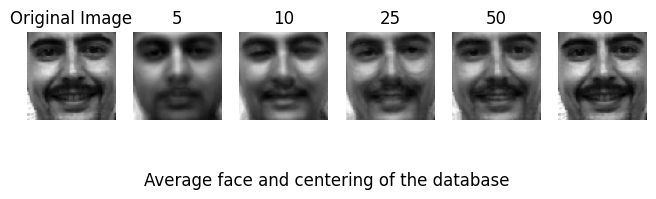

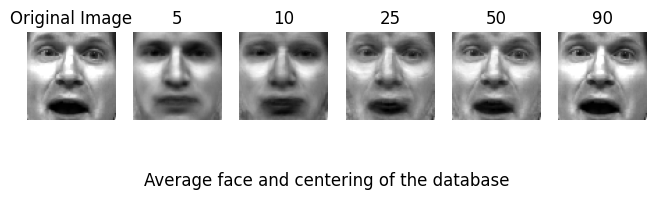

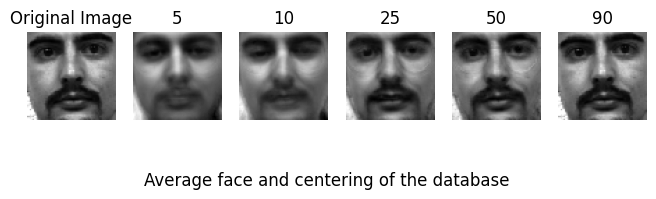

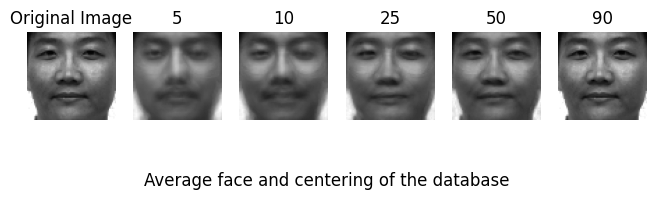

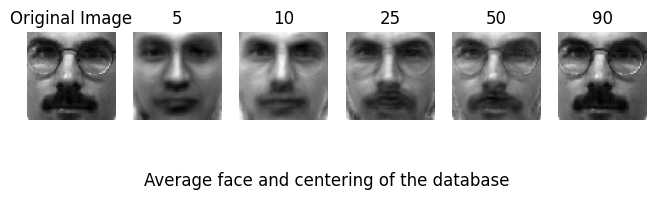

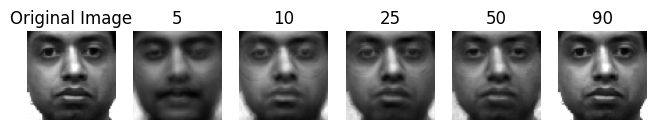

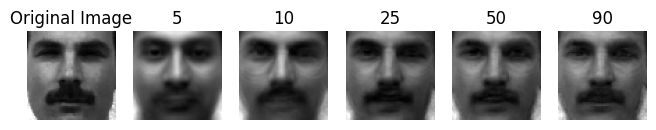

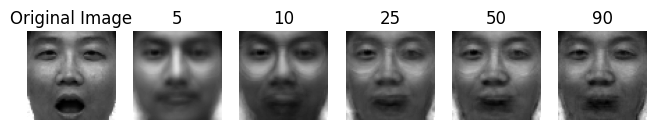

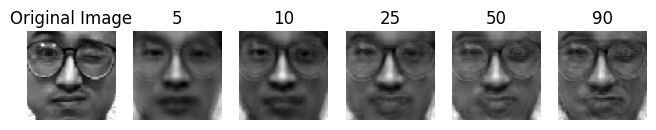

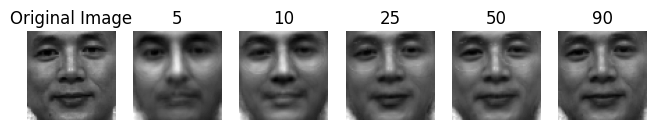

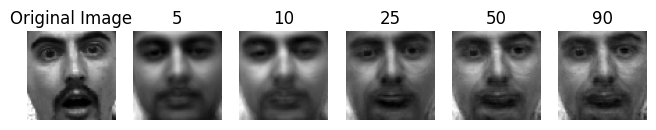

In [52]:
image_train=[49,5,50,80,6,55]
image_test=[2,27,15,10,17]
x_moy=avg_face
W=U
K=[5, 10, 25, 50, 90]

for i in image_train:
    x=X_train[:,i]
    plt.figtext(0.5, -0.05, "Average face and centering of the database", ha="center", fontsize=12)
    affiche_reconstruction(x, x_moy,W,K)
    
for i in image_test:
    x=X_test[:,i]
    affiche_reconstruction(x, x_moy,W,K)

In [34]:
# training image 55
x55train=X_train[:,55]
x_moytrain=avg_face
Wtrain=U
ktrain=90
z=projEigenface(x55train, x_moytrain, Wtrain, ktrain)
x_r=reconstruct(z,x_moytrain,Wtrain,ktrain)
error55=errorReconstruct(x_r, x55train)
print("The error obtained after reconstructing face number 55 of the training samples is: ", error55)

# testing image 17
x17test=X_test[:,17]
ktest=90
z=projEigenface(x17test, x_moytrain, Wtrain, ktest)
x_r=reconstruct(z,x_moytrain,Wtrain,ktest)
error17=errorReconstruct(x_r, x17test)
print("The error obtained after reconstructing face number 17 of the training samples is: ", error17)


The error obtained after reconstructing face number 55 of the training samples is:  6.5018360960144324e-12
The error obtained after reconstructing face number 17 of the training samples is:  1288.5794358586018


### Interpretation
For image 55 of the training base, the reconstruction error for  𝐾=𝑛=90 is extremely small and we can say that the reconstructed image is almost identical with the original image. This could be explained by the fact that we are using K=90 meaining a bit number of eigenfaces, equal to the number of samples we had in the training set. This means that most of the variation across the features of the faces in the training set will be very well represented by the first K eigenvectors chosen here. Reconstructing the same face by using eigenvectors that represented most of its variation would be extremely accurate in this case.

This is not the case however with image 17 of the test base, where we obtained an error of around 1288.63. The image reconstructed was a bit far from the original image.

6. Is there a difference between the reconstructions of the faces from the training base and those from the test base? Why?

### Interpretation

We notice from the displayed images and the error obtained, the reconstruction of the training base is more precise comparing with the testing base. This means that the coordinates of the projected image $z$ and the eigenfaces, when used to reconstruct a face not in the train set, will not be as accurate. This is because we're keeping K eigenvectors that have the largest eigenvalues, but if these features do not generalize well to the test set, the reconstructions would not be accurate. If the test set contains variations that are not accounted for in the training set, these variations will not be well-represented by the eigenfaces.

As a result, the test set images will not be accurately reconstructed. 

The reason for that as well, the fact that we only have 90 samples in the training set in comparison with 4096 features that could have different variations, the very small training set made it so that the PCA has essentially "memorized" the patterns in the training set rather than learning a robust representation.

7. __Bonus question__: Plot the evolution of the average error of reconstruction of test faces when $K$ varies from 1 to $N$. Is this evolution consistent with the cumulative sum previously calculated (exercise 2, question 4)?

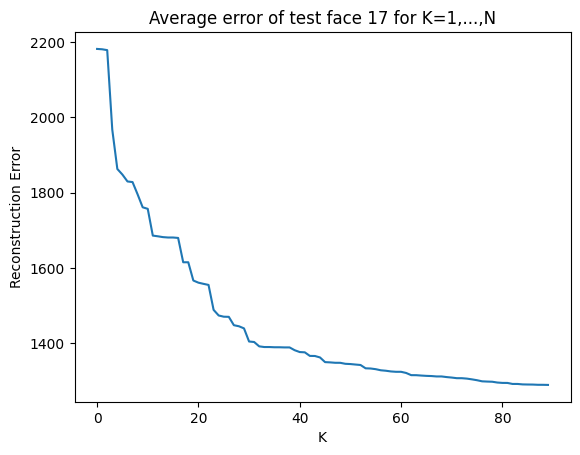

In [35]:
# plotting the average error of the reconstruction of test face 17 when K varies from 1 to 90
avg_error=[]
n=90
for k in  range(1,n+1):
        z=projEigenface(x17test, x_moytrain, Wtrain, k)
        x_r=reconstruct(z,x_moytrain,Wtrain,k)
        error17=errorReconstruct(x_r, x17test)
        avg_error+=[error17]

plt.plot(avg_error)
plt.title('Average error of test face 17 for K=1,...,N')
plt.xlabel('K')
plt.ylabel('Reconstruction Error')
plt.show()

### Interpretation
At first, the decrease if very fast because we are using the highest eigenvalues obtained from the training samples, so that explains why the average error decreases drastically at first. but then the decrease is less and less because we are including eigen values that are not as big (they dont represent a big variance between the features of a sample) that's why reconstruction error was not decreasing as drastically. this is consistent with the cumulative sum of eigen values seen and it explains this plot's evolution. 

We see that even when using k=90, we still get a very big error rate which could be due to the fact we are using a very small number of samples for training the model (90 compared with 4096 features). and so even the eigenvalues that represent the maximum variation among the features for the training samples will not be accurately representing the variation in a test sample.

# Exercise 4: Face recognition and identification

Each reference face $x_k^{train}$ has an identity associated with it, in the form of a $id^{train}(k)$ number. In this section, we try to identify a face $x^{test}$ from the reference faces.

The simplest method is to compare the projection $z^{test}$ of the test face $x^{test}$ with the projection $z_k^{train}$ of each reference image $x_k^{train}$ (see Figure 7). The dissimilarity between the two projected vectors is quantified by the distance in subspace $E_k(x^{test})$:

$$E_k(x^{test}) =\|z^{test}-z_k^{train}\|_2$$

![Figure_7.png](./figs/Figure_7.png)
<center>Figure 7: Projection of an image $J$ in the subspace of faces and comparison with a reference face $I_k$, in case $K=2$.<center>

This distance is evaluated for each reference face, we can determine the reference face $x_k^{train}$ closest to the test face $x^{test}$. **Its identifier $id^{train}(k)$ then allows for the recognition of the tested face.**


1.  What is the advantage of calculating the distance $E_k(x^{test})$ in the subspace of faces rather than in the original space?

the advantage is dimension reduction which makes it a lot easier to calculate the distance

2.  Write a function ``computeMatDist()`` which takes as arguments the training set of centered faces, $\mathbf Xc_{train}$ of size $d\times N_{train}$, the test set of centered faces, $\mathbf Xc_{test}$ of size $d\times N_{test}$, the subspace of eigenfaces, $\mathbf W$ and $K$, and computes the matrix $D$ of distance between a face of the test set and a face of the training set. $D$ is of size $N_{test} \times N_{train}$.

In [36]:
def calculMatDist(X_train, X_test, W, K):
    """ Array[d,n]*Array[d,m]*Array[d,n]*int -> Array[m,n]"""
    d,n=X_train.shape
    d,m=X_test.shape
    D=np.zeros((m,n))
    x_mean_train=meanFaces(X_train)
#     x_mean_test=meanFaces(X_test)
    for i in range(m):
        for j in range(n):
            xtrain=X_train[:,j]
            xtest=X_test[:,i]
            # compute ztrain and ztest
            ztrain=projEigenface(xtrain, x_mean_train, W, K)
            ztest=projEigenface(xtest, x_mean_train, W, K)
            distance=np.linalg.norm(ztest - ztrain)
            D[i,j]=distance
    return D

3.  Write a function `identification()` which takes as argument the matrix of distances $D$ (computed by the previous function), the vector of identification of the training set $id^{train}$, and returns the identificaton vector $\hat{id}^{test}$ of size $N_{test}$ of the elements of the test set.

In [37]:
def identification(D, id_train):
    """ Array[m,n]*Array[n] -> Array[m]"""
    n,m= D.shape
    id_test=np.zeros((n))
    id_test=np.int64(id_test)
    for i in range(n):
        minimum=np.min(D[i,:])
        index_of_min=np.argwhere(D[i,:]==minimum)[0]
        id_of_index=id_train[index_of_min]
        id_test[i]=id_of_index[0]
    return id_test

4. Compute for $K=30$ the identification rate by comparing $\hat{id}^{test}$ to $id^{test}$ labels. Then vary $K$, and plot the curve of the number of recognized faces as a function of $K$. Explain the shape of the curve obtained. Which value of $K$ can be taken to have a good recognition and a low calculation time?

In [38]:
# k=30:
# computing D, and the id_test2  
K=30
W=Wtrain
D=calculMatDist(X_train, X_test, W, K)
id_test2=identification(D,id_train)

print("IDs of test faces after comparing with the train: " , id_test2)
print("The correct IDs of the test faces: ", id_test)

correct_id=np.sum(id_test==id_test2)
# identification rate= nbr of correct identifications / number of testing samples
id_rate=(correct_id/len(id_test))*100
print("The identification rate between the actual id_test and the calculated id_test is: ", id_rate)

IDs of test faces after comparing with the train:  [ 0  0  1  1  2  2  3  3  4  4  5  5  6  1  7  3  8  8  9  9 10 10 11  5
 12 12 13 13 14 14]
The correct IDs of the test faces:  [ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11
 12 12 13 13 14 14]
The identification rate between the actual id_test and the calculated id_test is:  90.0


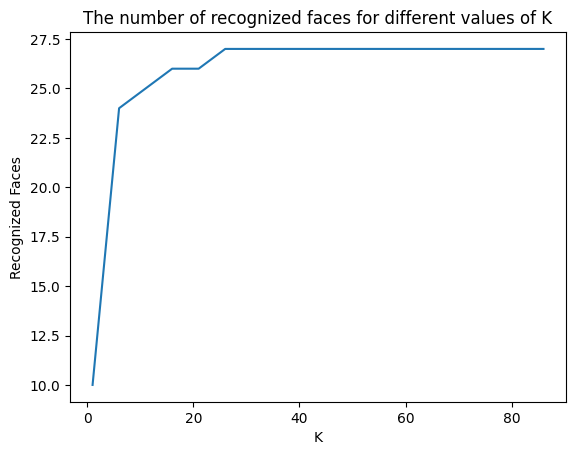

In [39]:
# for different values of K:
# K=30 --> number of recognized faces is : correct_id calculated above
listK=range(1,91,5)
recognized_faces=np.zeros((len(listK)))

for i, k in enumerate(listK):
    D=calculMatDist(X_train, X_test, W, k)
    id_test2=identification(D,id_train) 
    correct_id=np.sum(id_test==id_test2)
    recognized_faces[i]=correct_id
    
plt.plot(listK,recognized_faces)
plt.title('The number of recognized faces for different values of K')
plt.xlabel('K')
plt.ylabel('Recognized Faces')
plt.show()


### Interpretation
The number of recognized faces increases as K increases. This increase is rapid for k<20 and it slows down after that. For K around 30, the number of recognized faces plateaus at 27 faces recognized correctly. This makes sense because the smaller the k, the less dimensions are used to predict the face of the test sample among the trained, which would decrease the accuracy of the prediction. The accuracy increases as k increases until we hit a threshold of K where the number of dimensions chosen are enough to estimate to which id the face of the test belongs to. According to the graph, the best K that gave the highest number of correctly recognized faces for the least calculation time would be K=30.

5.  **Bonus question**: for $K=30$, calculate for each face of the training set its distance in the subspace $\mathbf W_K$ from each element of the training set. Display the result as the image of a matrix. Comment the result.

In [40]:
print(id_train)

[ 0  0  0  0  0  0  1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3
  4  4  4  4  4  4  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7
  8  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10 10 10 11 11 11 11 11 11
 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14]


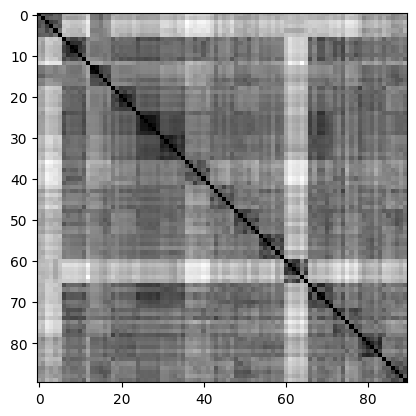

In [41]:
W=Wtrain
K=30
D=calculMatDist(X_train, X_train, W, K)
plt.imshow(D, cmap="gray")
plt.show()

6. **Bonus question**: What are the minimal and maximal distances between two faces of the same category (i.e. same person)? Between two faces of different categories? If we want to choose a threshold $\theta$  to detect the presence of an unknown face, which indications do the previous min/max values give us?

In [42]:
# looping through each person ( we have 15 people )
# getting the minimum and maximum distances between two faces of the same category:
number_of_people=np.max(id_train)+1
for i in range(number_of_people):
    nbr_of_face=len(np.where(id_train==i)[0])
    minimum = np.min(D[nbr_of_face*i,nbr_of_face*i+1:nbr_of_face*i+(nbr_of_face-1)]) # we apply the min function on the subarray from 0 to 5, then from 6 to 11, etc
    maximum= np.max(D[nbr_of_face*i,nbr_of_face*i:nbr_of_face*i+(nbr_of_face-1)]) # we apply the max function on the subarray from 0 to 5, then from 6 to 11, etc
    print("The minimum distance between two faces for person number ", i, "is: ", minimum)
    print("The maximum distance between two faces for person number ", i, "is: ", maximum)
    print("\n")

# getting the minimum and maximum distances between two faces of different categories:
for i in range(number_of_people):
    for j in range(i+1,number_of_people):
        nbr_of_face=len(np.where(id_train==i)[0])
        minimum=np.min(D[(nbr_of_face*i):((nbr_of_face*i)+nbr_of_face-1),(nbr_of_face*j):((nbr_of_face*j)+nbr_of_face-1)])
        maximum=np.max(D[(nbr_of_face*i):((nbr_of_face*i)+nbr_of_face-1),(nbr_of_face*j):((nbr_of_face*j)+nbr_of_face-1)])
        print("The minimum distance between two faces for person number ", i, " and person number ", j, "is: ", minimum)
        print("The maximum distance between two faces for person number ", i, " and person number ", j, "is: ", maximum)
        print("\n")

The minimum distance between two faces for person number  0 is:  1991.1696696282904
The maximum distance between two faces for person number  0 is:  2698.254838085273


The minimum distance between two faces for person number  1 is:  1690.7397881911984
The maximum distance between two faces for person number  1 is:  2356.4576198712557


The minimum distance between two faces for person number  2 is:  3882.2263847611507
The maximum distance between two faces for person number  2 is:  4426.724636034595


The minimum distance between two faces for person number  3 is:  1647.0944020133313
The maximum distance between two faces for person number  3 is:  2478.6695262786666


The minimum distance between two faces for person number  4 is:  1288.2866278689064
The maximum distance between two faces for person number  4 is:  1417.2814609891298


The minimum distance between two faces for person number  5 is:  760.2438131335813
The maximum distance between two faces for person number  5 is:  1539

To choose a proper threshold, if we have a face, we calculate the distance between it and all the faces of all the different categories (people) we have in id_train. If the min of those distances is in the range

In [ ]:
# 0-0 0-1 0-2 0-3 0-3 ... 0-15
# 1-0 1-1 1-2 ...         1-15
# ...
# 15-0                     15-15
each element = [min, max]
# i - all faces
# i == 0
# dist[i, 1] = range(min,max)(0-1)

# Exercise 5: face/non-face classification

Until now, we focused on comparing facial images with each other. However, the method provides information that we have not yet used. In particular, the reconstruction error can be used to verify that an image is indeed an image of a face. When an image contains something other than a face (an image of a flower, a person seen in its entirety, a random image...), we can say that it is a non-face (database *noface*).

![figure8](./figs/Figure_8.png)
<center>Figure 8: Illustration of possible cases for classifying an image: case 1,2) $Z$ close to subspace: it is a face 3,4) $Z$ far from subspace: it is not a face, 1) $Z$ is an identified face, case 2) $z$ is an unknown face, case 3) risk of identifying $Z$ as a face when it is not.

1.  With $K=30$, for each set, training set, test set, and *noface* set, plot the reconstruction error of all the images of each set (this provides 3 plots). Compute the minimal, average, maximal errors for the three sets. Which conclusion can be drawn?

2. Visualize the reconstruction error by displaying the original image and the reconstructed image for 10 images of the face database, and for the 10 images of the noface database. Comment the results.